# Group Proposal

## Introduction

Our data set is from the processed.cleveland.data

## Preliminary exploratory data analysis:

### reading the data frame
* since it is the csv file. We use read_csv() function to read the file. Then we noticed that there's no column names in the data set. We fill the names through [the disease name file](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names). Finally,we make column into the correct data type.

In [1]:
library(tidyverse)
library(readr)

df<-read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",col_names = FALSE)
df1<-separate(df,X1,sep = ",",into =c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca",'thal','num'))


df1$age<-as.numeric(df1$age)
df1$sex<-as.factor(df1$sex)
df1$cp<-as.factor(df1$cp)
df1$trestbps<-as.numeric(df1$trestbps)
df1$chol<-as.numeric(df1$chol)
df1$fbs<-as.factor(df1$fbs)
df1$restecg<-as.factor(df1$restecg)
df1$thalach<-as.numeric(df1$thalach)
df1$exang<-as.factor(df1$exang)
df1$oldpeak<-as.numeric(df1$oldpeak)
df1$slope<-as.factor(df1$slope)
df1$ca<-as.factor(df1$ca)
df1$thal<-as.factor(df1$thal)
df1$num<-as.factor(df1$num)

head(df1)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character()
)




age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1.0,1.0,145,233,1.0,2.0,150,0.0,2.3,3.0,0.0,6.0,0
67,1.0,4.0,160,286,0.0,2.0,108,1.0,1.5,2.0,3.0,3.0,2
67,1.0,4.0,120,229,0.0,2.0,129,1.0,2.6,2.0,2.0,7.0,1
37,1.0,3.0,130,250,0.0,0.0,187,0.0,3.5,3.0,0.0,3.0,0
41,0.0,2.0,130,204,0.0,2.0,172,0.0,1.4,1.0,0.0,3.0,0
56,1.0,2.0,120,236,0.0,0.0,178,0.0,0.8,1.0,0.0,3.0,0


### Making the training data set and test data set
* We randomly split 70% of data into train data set,and 30% of data into test data set.

In [2]:
set.seed(123)
train_ind<-sample.int(nrow(df1),0.7*nrow(df1))
train <- df1[train_ind , ]
test <- df1[-train_ind , ]

head(train)
head(test)
nrow(train)
nrow(test)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
43,1.0,3.0,130,315,0.0,0.0,162,0.0,1.9,1.0,1.0,3.0,0
44,1.0,2.0,120,263,0.0,0.0,173,0.0,0.0,1.0,0.0,7.0,0
68,0.0,3.0,120,211,0.0,2.0,115,0.0,1.5,2.0,0.0,3.0,0
35,0.0,4.0,138,183,0.0,0.0,182,0.0,1.4,1.0,0.0,3.0,0
45,1.0,1.0,110,264,0.0,0.0,132,0.0,1.2,2.0,0.0,7.0,1
54,1.0,4.0,110,206,0.0,2.0,108,1.0,0.0,2.0,1.0,3.0,3


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
67,1.0,4.0,160,286,0.0,2.0,108,1.0,1.5,2.0,3.0,3.0,2
67,1.0,4.0,120,229,0.0,2.0,129,1.0,2.6,2.0,2.0,7.0,1
57,0.0,4.0,120,354,0.0,0.0,163,1.0,0.6,1.0,0.0,3.0,0
56,0.0,2.0,140,294,0.0,2.0,153,0.0,1.3,2.0,0.0,3.0,0
52,1.0,3.0,172,199,1.0,0.0,162,0.0,0.5,1.0,0.0,7.0,0
54,1.0,4.0,140,239,0.0,0.0,160,0.0,1.2,1.0,0.0,3.0,0


[1] 212

[1] 91

### The distribution of the response variable

* Since there are 5 states of num which is num=0,1,2,3,4. I calculate the distribution through the filter function.

In [4]:
tn1<-train%>%filter(num=="1")
tn0<-train%>%filter(num=="0")
tn2<-train%>%filter(num=="2")
tn3<-train%>%filter(num=="3")
tn4<-train%>%filter(num=="4")
c(nrow(tn0),nrow(tn1),nrow(tn2),nrow(tn3),nrow(tn4))

[1] 114  42  25  21  10

### The visualization of data 
* We used the pairs function to show the correlation between each variable and use color to classify them in to different num group.

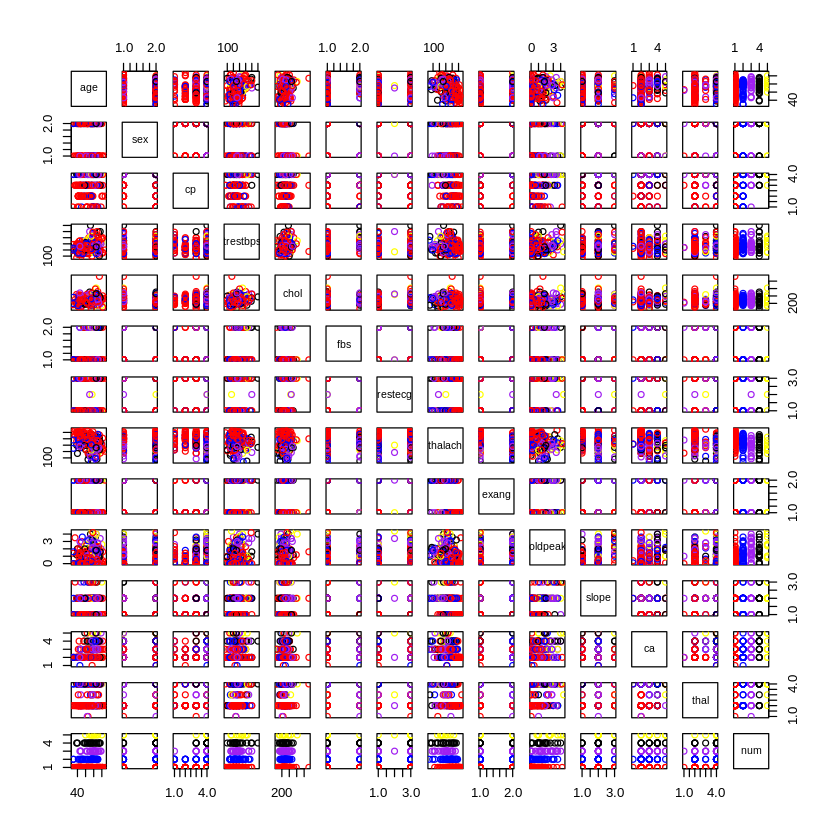

In [3]:
group<-NA
group[train$num==0]<-1
group[train$num==1]<-2
group[train$num==2]<-3
group[train$num==3]<-4
group[train$num==4]<-5
pairs(train,col = c("red","blue","purple","black","yellow")[group])

### The visualization of data (part 2)
* Since the pairs function isn't clear enough. We decide to make individual plots

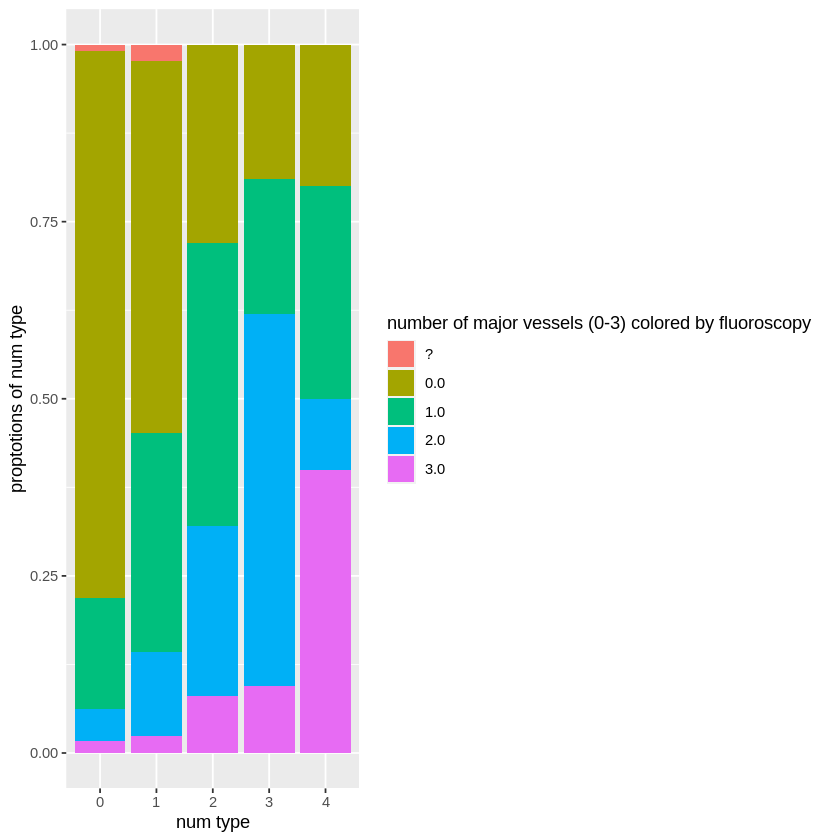

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



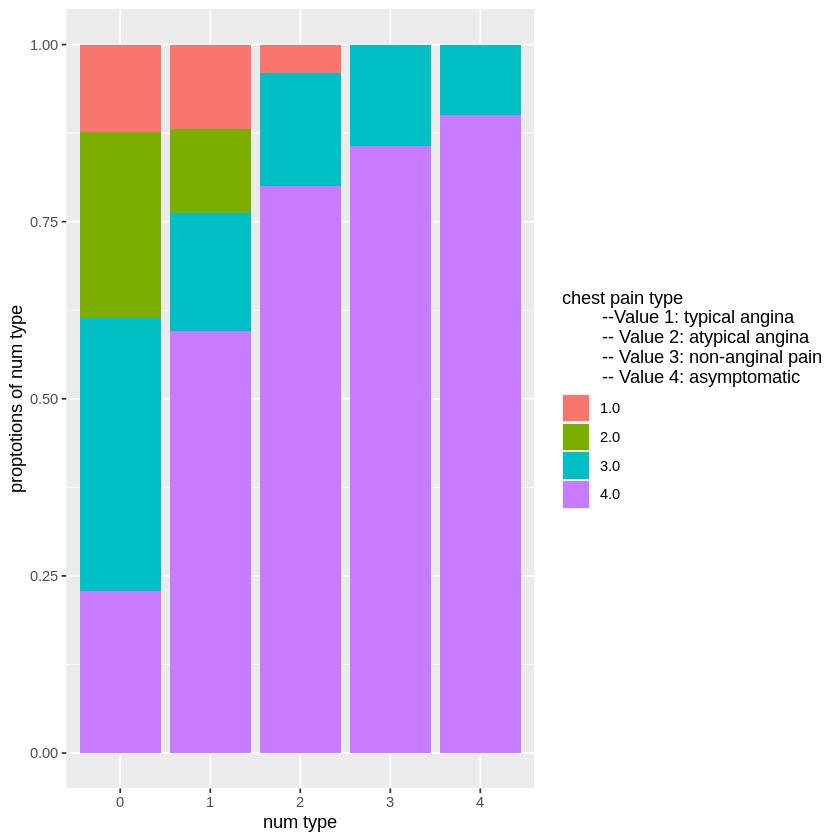

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



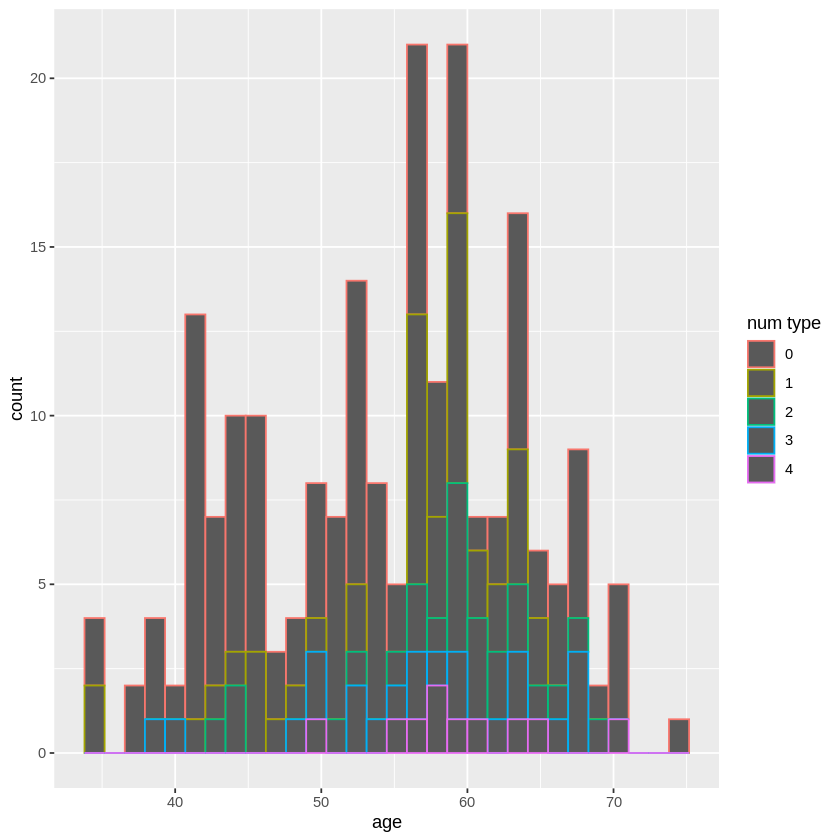

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



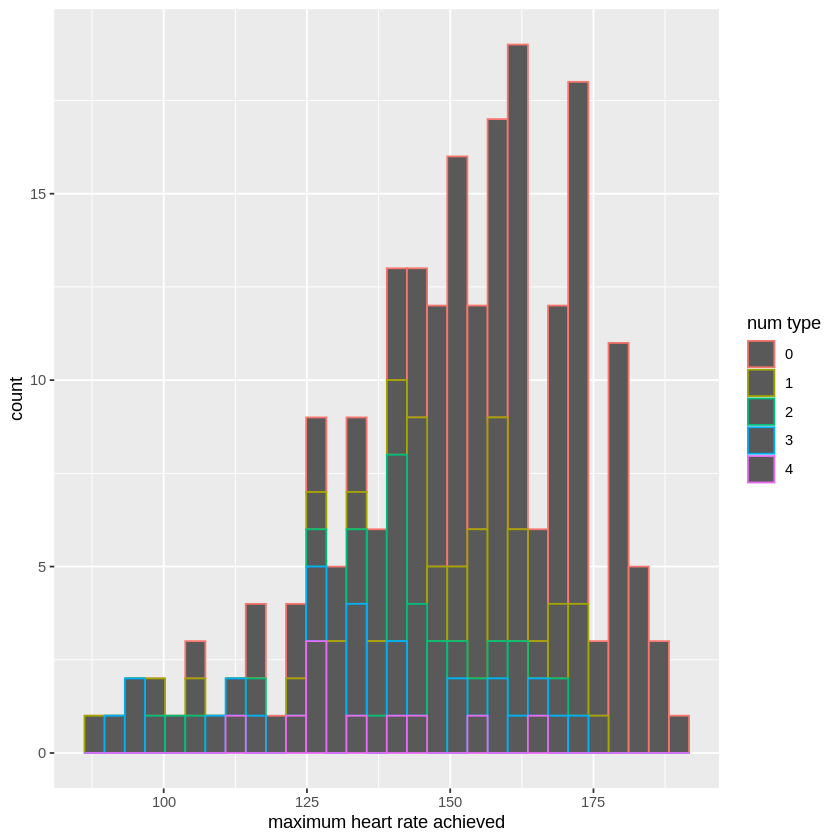

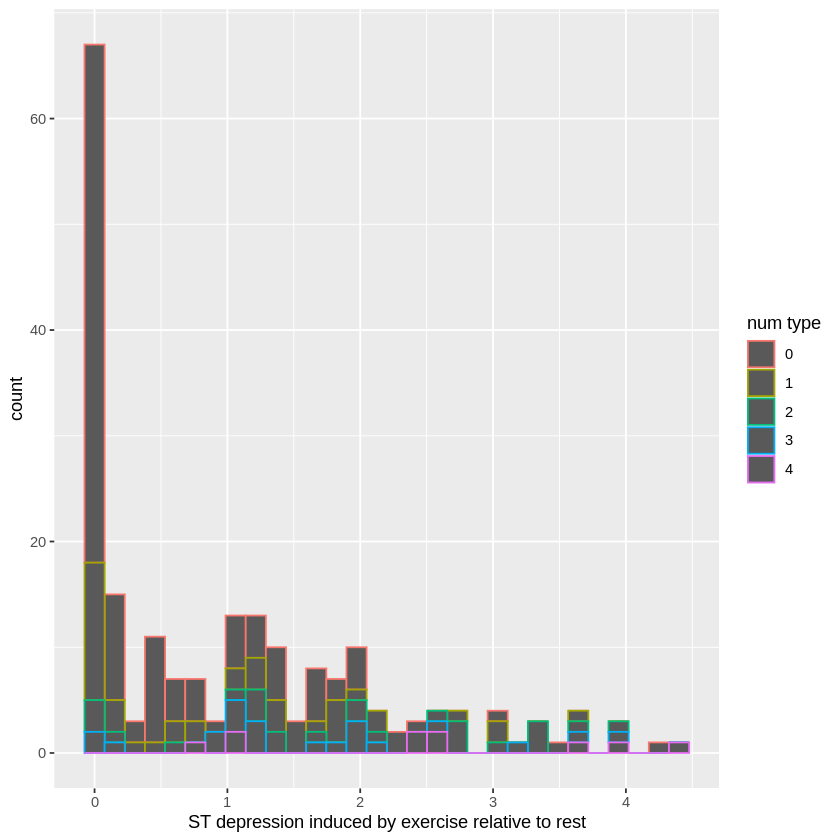

In [6]:
train%>%ggplot(aes(x=num,fill=ca))+geom_bar(position="fill")+
labs(x="num type",y="proptotions of num type",fill="number of major vessels (0-3) colored by fluoroscopy")

train%>%ggplot(aes(x=num,fill=cp))+geom_bar(position="fill")+
labs(x="num type",y="proptotions of num type",fill="chest pain type 
        --Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic")

train%>%ggplot(aes(x=age,col=num))+geom_histogram()+labs(x="age",col="num type")

train%>%ggplot(aes(x=thalach,col=num))+geom_histogram()+labs(x="maximum heart rate achieved",col="num type")

train%>%ggplot(aes(x=oldpeak,col=num))+geom_histogram()+labs(x="ST depression induced by exercise relative to rest",col="num type")

## Methods:

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




,0,1,2,3,4,MeanDecreaseAccuracy,MeanDecreaseGini
age,8.648,2.000,4.390,-5.260,-2.225,7.818,8.865
sex,6.087,-0.742,-0.303,-0.633,-0.133,4.941,1.735
cp,10.357,0.375,5.080,3.789,4.505,11.575,9.439
trestbps,-0.221,-3.296,-0.149,-0.384,2.868,-1.302,7.608
chol,-1.738,-1.839,1.720,-0.530,-1.782,-1.797,7.840
fbs,1.276,-1.572,-0.414,0.857,0.000,0.610,1.298
restecg,1.648,-0.179,-2.701,-2.011,0.376,-0.298,1.669
thalach,10.820,-0.206,4.023,2.587,3.714,11.176,11.746
exang,2.119,6.103,2.219,0.174,-1.996,5.030,3.785
oldpeak,8.389,-4.106,7.903,-1.881,2.911,8.552,11.484


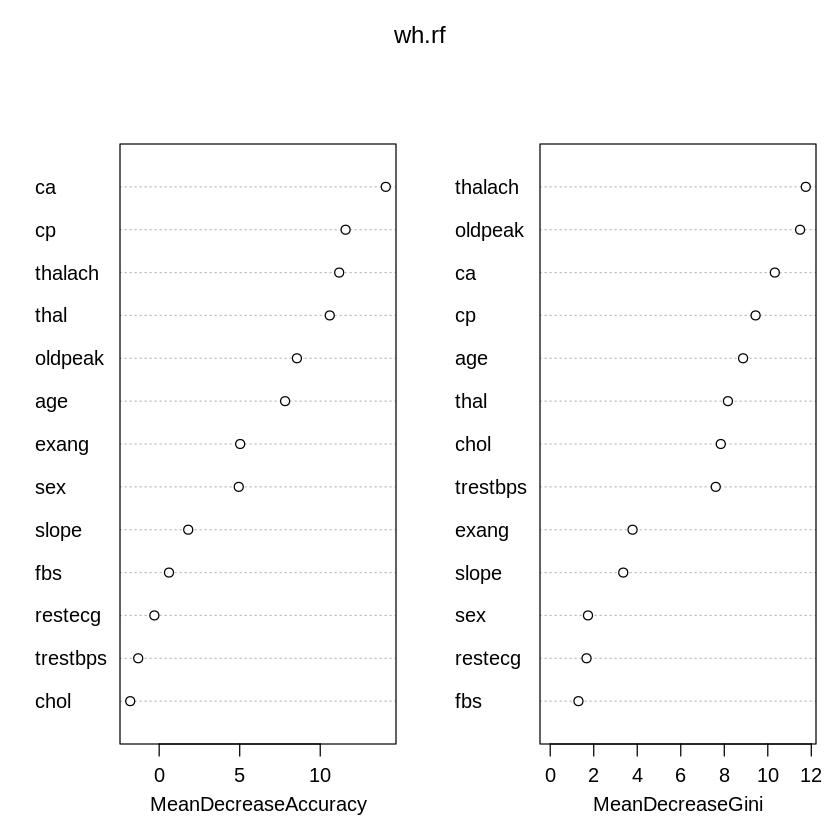

In [7]:
library(randomForest)
wh.rf <- randomForest(data=train, num~ . , mtry=4, nodesize=7, importance=TRUE, keep.forest=TRUE)
round(importance(wh.rf),3)

varImpPlot(wh.rf)

* Putting all the variables in to the model will cause over fitting which means the model cannot work properly towards the data which is not being included in the training data set. 

* Thus we need to do the variable selection for our model. In here, I made a variable importance plot from random forest. It can helps me to verify which variable is important to help us to do the classification.

* We can make different models and test the root mean squared predictions error towards them. 
* We can set the different numbers of cross validation to calculate the error. 

## Expected outcomes and significance:

* We expect people with higher age,maximum heart rate achieved,and ST depression induced by exercise relative to rest tends to have presence of heart diseases. Since we think people is easy to get heart attack when they are old. High maximum heart rate achieved means that the heart rate is not steady and that they might have heart diseases. Too low and too high ST depression induced by exercise relative to rest means that the heart ability is not capable. We also expects people with more than 0 major vessels colored by fluoroscopy and have asymptomatic chest pain tends to have presence of heart disease. Since people with more than 0 major vessels colored by fluoroscopy have problems on major vessels and major vessels are strongly connected with the heart. Also, the asymptomatic chest pain means that people cannot detect where the source of pain comes from that it has large probability of having problems on heart disease.

* We also can just look at the distribution through the histograms and bar plots to make a guess.

* These findings might help us to classify the people has heart disease.

* This could lead to the correlation between these findings and the heart disease that we can learn how to avoid the heart disease